In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

data_path = "./" # "../../../data/output/"
qualifier_analysis_path = data_path + "qualifier_analysis.csv"
qualified_results_path = data_path + "qualified_analysis.csv"
control_results_path = data_path + "control_analysis.csv"
hitwise_qualified_analysis_path = data_path + "hitwise_qualified_analysis.csv"
hitwise_control_analysis_path = data_path + "hitwise_control_analysis.csv"

### Qualifier Results

In [2]:
qa = qualifier_analysis = pd.read_csv(qualifier_analysis_path)

In [3]:
qa.head()

Accuracy  CohenKappa  GoldAccuracy  GoldCohenKappa        WorkerId
0  0.666667    0.454545           1.0             1.0  A3EG4C9T4F5DUR
1  0.333333   -0.142857           1.0             1.0  A1DXFMUVK5015A
2  0.666667    0.454545           1.0             1.0   AD6BM44M51JKD
3  0.666667    0.454545           1.0             1.0  A3IEZOB3OECVJU
4  0.666667    0.454545           0.5             0.2   AISNLDPD2DFEG

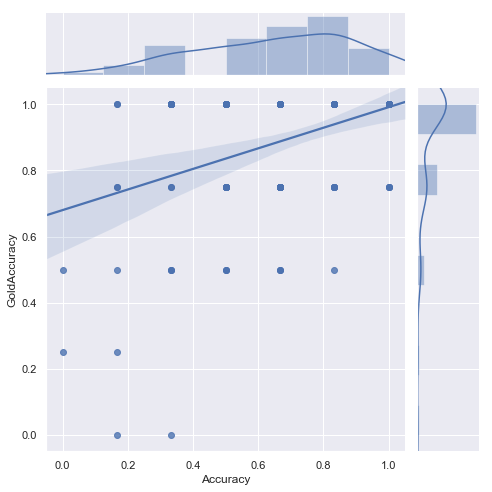

In [4]:
import seaborn as sns
sns.set(style="darkgrid")
g = sns.jointplot("Accuracy", "GoldAccuracy", data=qa, kind="reg",
                  xlim=(-0.05, 1.05), ylim=(-0.05, 1.05), color="b", height=7)

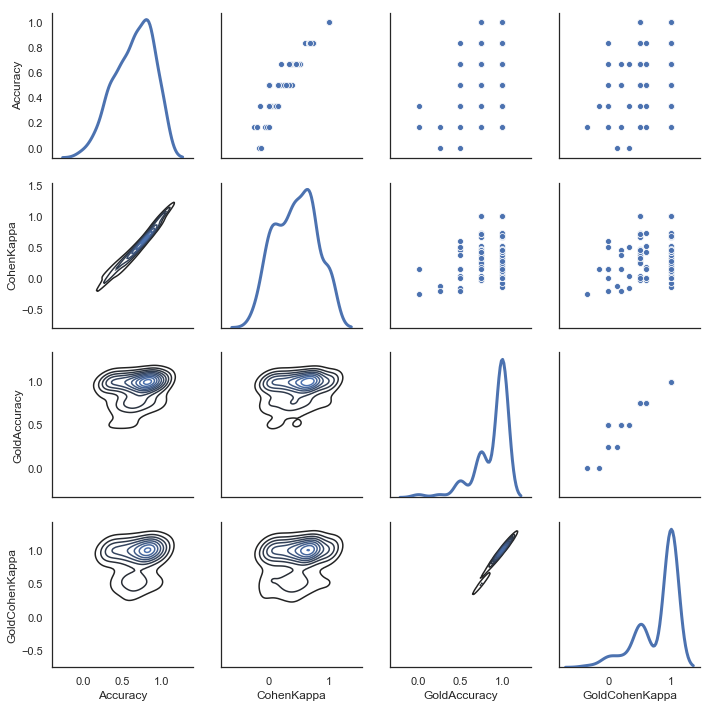

In [5]:
sns.set(style="white")
g = sns.PairGrid(qa, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)
g = g

In [6]:
qa.describe()

Accuracy  CohenKappa  GoldAccuracy  GoldCohenKappa
count  150.000000  150.000000    150.000000      150.000000
mean     0.646667    0.449159      0.881667        0.799778
std      0.244187    0.335454      0.202121        0.317801
min      0.000000   -0.250000      0.000000       -0.333333
25%      0.500000    0.142857      0.750000        0.500000
50%      0.666667    0.454545      1.000000        1.000000
75%      0.833333    0.684211      1.000000        1.000000
max      1.000000    1.000000      1.000000        1.000000

### Comparitive Performance between Control and Qualified Results

High-level analysis. Shows overall statistics for the 2 slices.

In [7]:
qr = qualified_results = pd.read_csv(qualified_results_path)
cr = control_results = pd.read_csv(control_results_path)

In [8]:
qualified_results.head()

experiment_name  cohen_score_max  cohen_score_min  cohen_score_mean  \
0      valid data         0.666667        -0.302326          0.159276   
1    invalid data        -1.000000        -1.000000         -1.000000   
2        all data         0.666667        -0.302326          0.160515   

   cohen_score_med  cohen_score_std  best_cohen_score_max  \
0         0.139685         0.252978              0.666667   
1        -1.000000         0.000000             -1.000000   
2         0.148936         0.243816              0.666667   

   best_cohen_score_min  best_cohen_score_mean  best_cohen_score_med  \
0             -0.066667               0.318729              0.304348   
1             -1.000000              -1.000000             -1.000000   
2             -0.066667               0.360640              0.326241   

   best_cohen_score_std  max_time (m)  min_time (m)  mean_time (m)  \
0              0.239605    281.366667      5.633333      34.328571   
1              0.000000     45.533333      8.766667      18.826667   
2              0.223113    281.366667      5.633333      32.893210   

   med_time (m)  std_time (m)  hit count  
0     12.666667     59.198507         14  
1     14.916667     13.650277          0  
2     12.700000     56.722299         18

In [9]:
control_results.head()

experiment_name  cohen_score_max  cohen_score_min  cohen_score_mean  \
0      valid data         0.627907        -0.365854          0.108619   
1    invalid data         0.636364        -0.488372          0.047522   
2        all data         0.741935        -0.488372          0.031958   

   cohen_score_med  cohen_score_std  best_cohen_score_max  \
0         0.040000         0.249496              0.741935   
1         0.032195         0.211044              0.636364   
2         0.000000         0.210973              0.741935   

   best_cohen_score_min  best_cohen_score_mean  best_cohen_score_med  \
0             -0.021277               0.354145              0.380952   
1             -0.280000               0.221528              0.269444   
2              0.166667               0.461937              0.475269   

   best_cohen_score_std  max_time (m)  min_time (m)  mean_time (m)  \
0              0.216700    296.866667      5.533333      91.090816   
1              0.276844    121.266667      0.433333      17.312077   
2              0.145679    296.866667      0.433333      47.949011   

   med_time (m)  std_time (m)  hit count  
0        72.200     72.730851         12  
1         5.600     24.689415         12  
2        20.225     62.247704         18

Examines results on a per HIT basis. I currently don't recover the perf across slices.

In [10]:
qrh = pd.read_csv(hitwise_qualified_analysis_path)
crh = pd.read_csv(hitwise_control_analysis_path)
df = qrh.append(crh)
df.head()

cohen_score_mean  cohen_score_max  valid           qualified
0          0.360866         0.489362   True  qualified_analysis
1         -0.023678         0.183673   True  qualified_analysis
2          0.242735         0.619048   True  qualified_analysis
3         -0.109892         0.024390   True  qualified_analysis
4          0.466667         0.644444   True  qualified_analysis

In [11]:
df.describe()

cohen_score_mean  cohen_score_max
count         38.000000        38.000000
mean           0.094608         0.351224
std            0.162999         0.216986
min           -0.170366        -0.066667
25%           -0.037308         0.209524
50%            0.077727         0.333333
75%            0.192812         0.517551
max            0.466667         0.666667

In [12]:
sns.set(style="darkgrid")
p = sns.relplot(x="cohen_score_mean", y="cohen_score_max", hue="qualified", size="valid",
            sizes=(200, 40), alpha=.5, palette="muted",
            height=6, data=df)

In [13]:
g = sns.jointplot("cohen_score_mean", "cohen_score_max", data=df,
                  xlim=(-1.0, 1.0), ylim=(-1.0, 1.0), color="b", height=7, kind="reg")